This Notebook will use the default configuration to train YOLOv8 with modification.
The first step is lower the downsampling factor.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.3/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AXtvn8E5cqIPHd94QNpU")
project = rf.workspace("university-college-london-pmvix").project("nrmm")
dataset = project.version(10).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=0bad0667445c1f80d037ae977fe50de968b2090a5337b679da3fc19b6a311392
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to -NRMM-10 in yolov8:: 100%|██████████| 8659/8659 [00:02<00:00, 4301.01it/s]


##1. Downsampling Factor

###A. Change the first convolutional layer stride to 1 and hence the downsampling factor decrease from 32 to 16.

In [ ]:
#Try with more ephocs
from ultralytics import YOLO

# Load a model
model = YOLO("/content/yolov8_down1.yaml")  # build a new model from scratch

# Use the model
model.train(data="/content/-NRMM-10/data.yaml", epochs=50, imgsz=640)  # train the model
metrics = model.val()  # evaluate model performance on the validation set



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

/content


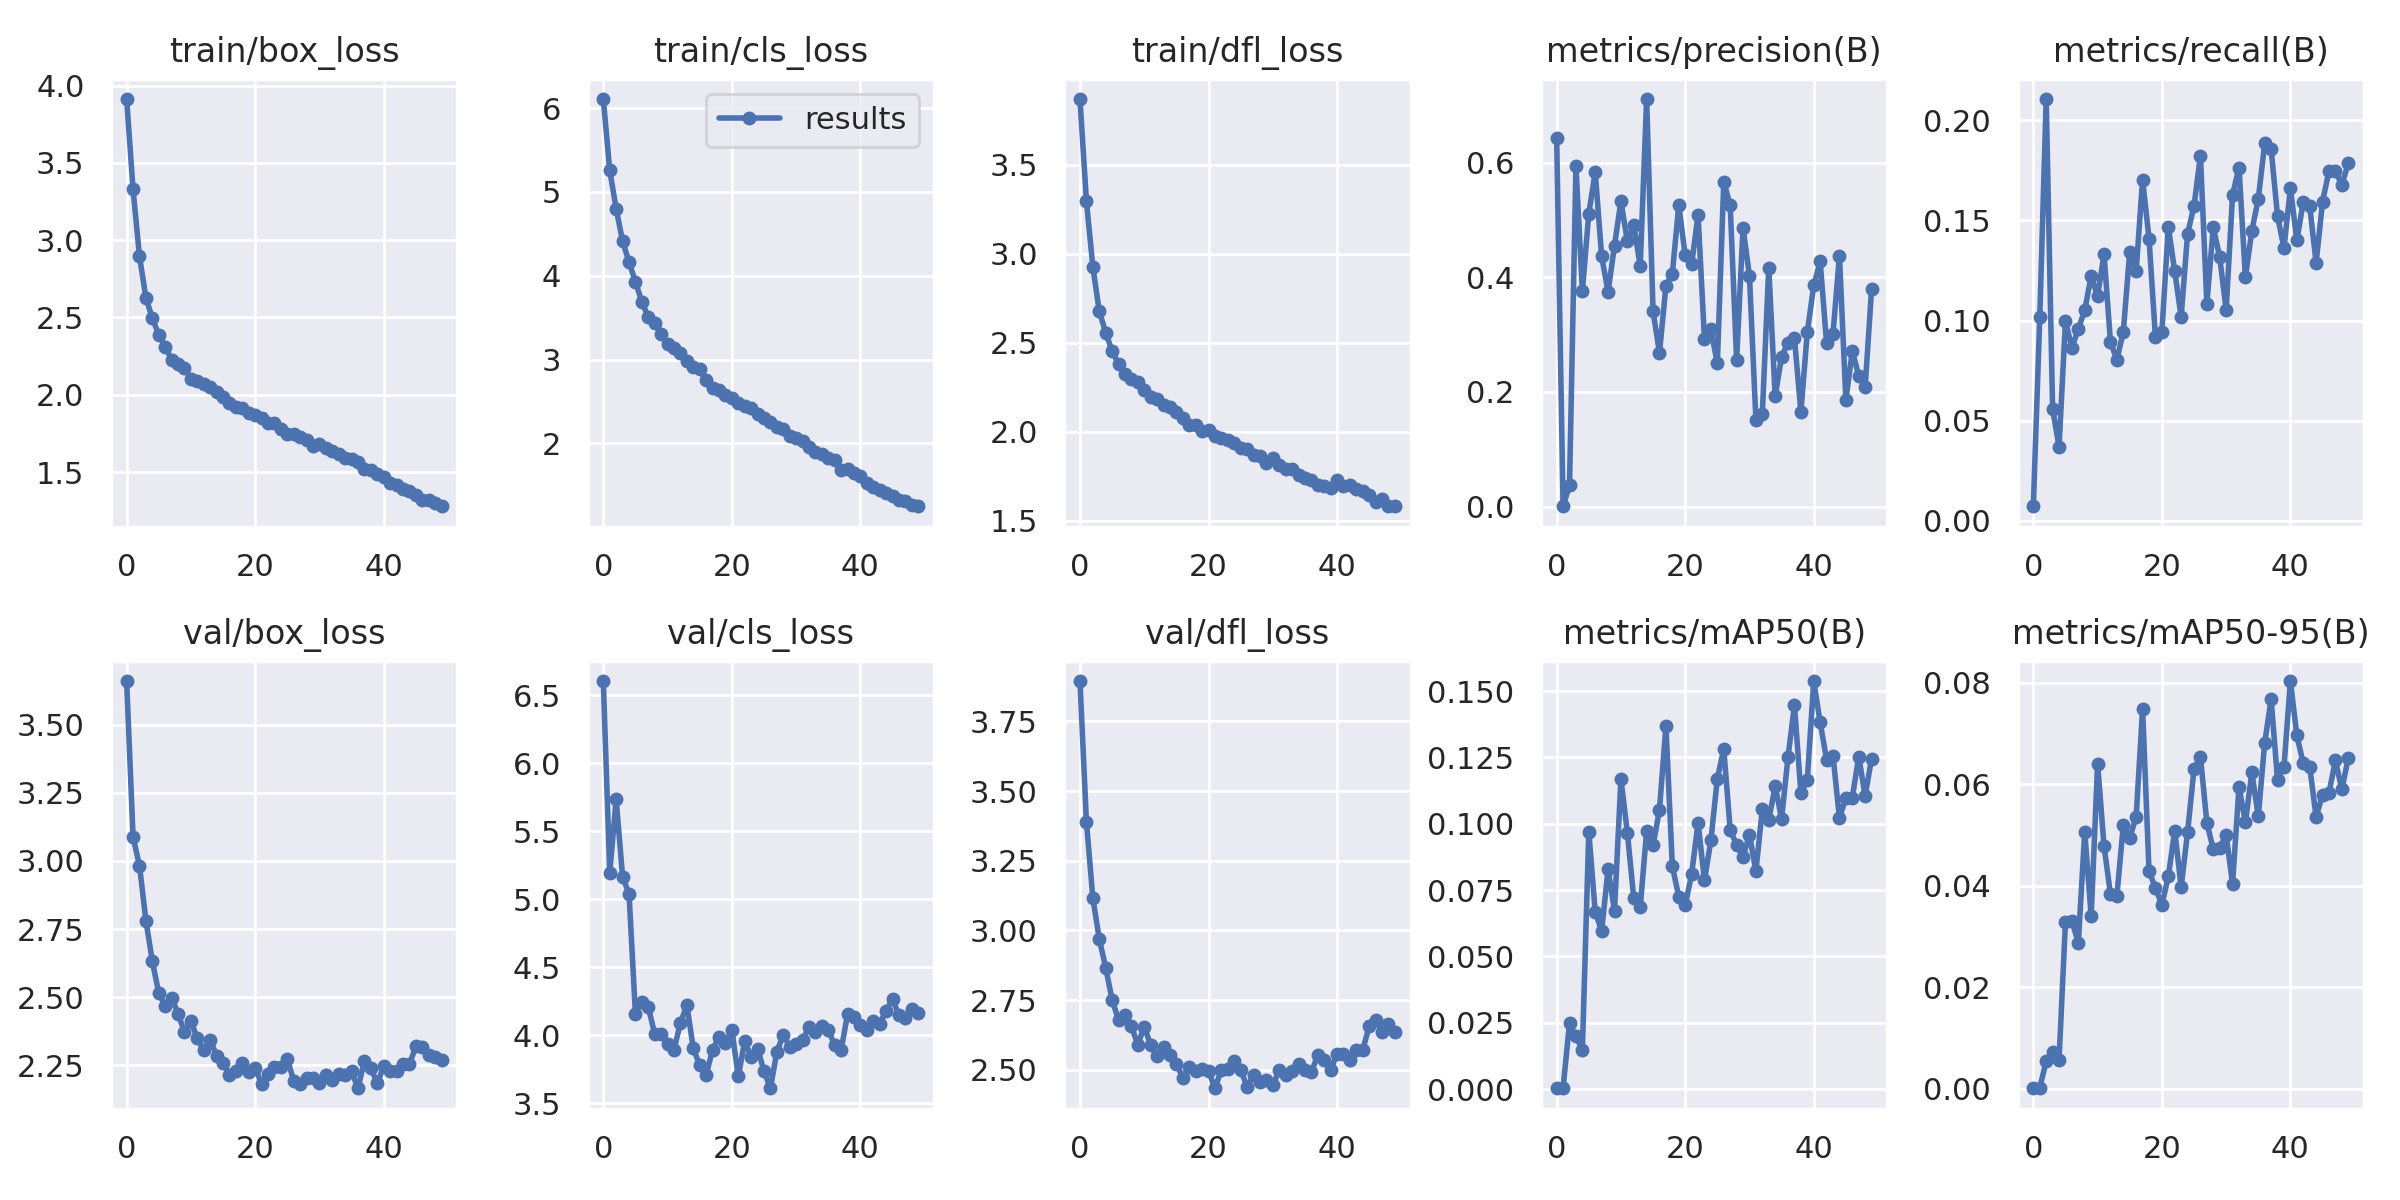

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


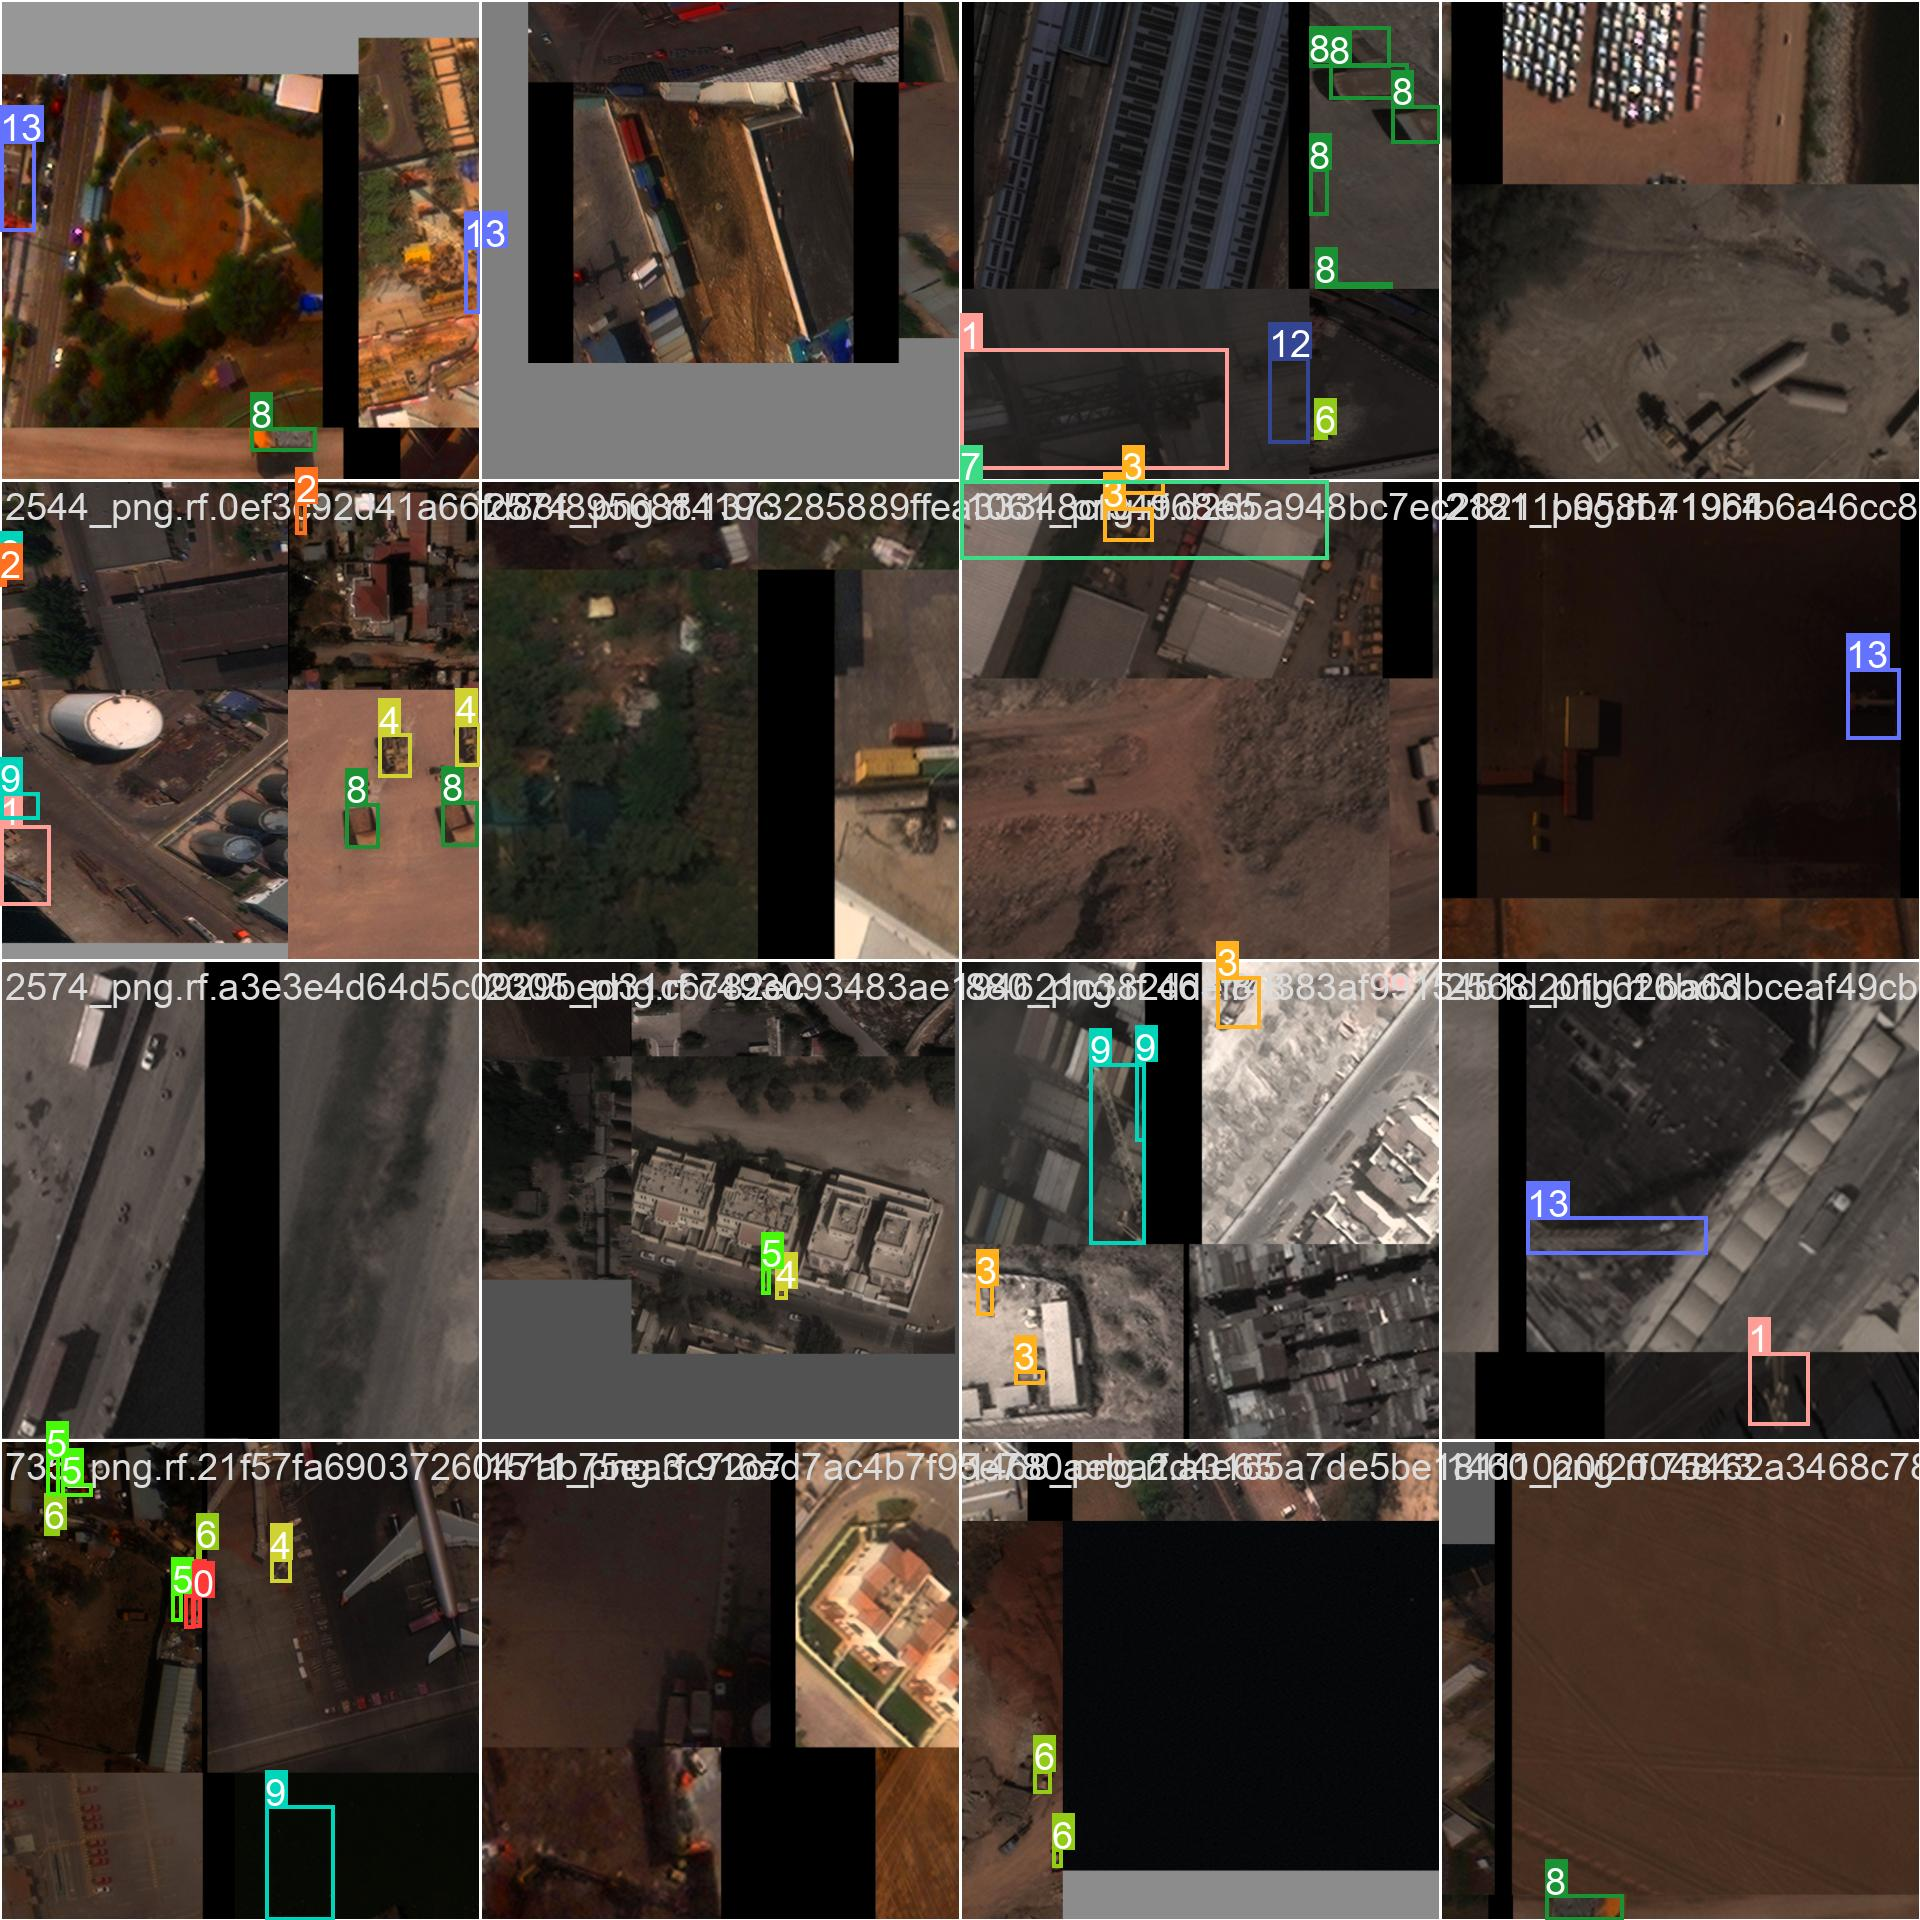

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/train_batch0.jpg', width=600)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-14 07:54:46.190778: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8_down1 summary (fused): 168 layers, 11131002 parameters, 0 gradients, 113.9 GFLOPs
val: Scanning /content/-NRMM-10/valid/labels.cache... 198 images, 25 backgrounds, 0 corrupt: 100% 198/198 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:05<00:00,  2.22it/s]
                   all        198        371      0.403      0.163      0.154     0.0807
          Cement Mixer        198          3      0.685      0.667      0.666      0.367
       Container Crane        198         72       0.12     0.0694      0.043     0.0152
           Crane Truck        198         12          0          0     0.0811     0.0255
            Dump Truck        198         68      0.301       0.25       

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-14 07:55:06.780065: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8_down1 summary (fused): 168 layers, 11131002 parameters, 0 gradients, 113.9 GFLOPs
image 1/163 /content/-NRMM-10/test/images/1063_png.rf.1e2fc921f5474735a2203f61ac9e673d.jpg: 576x640 120.2ms
image 2/163 /content/-NRMM-10/test/images/1063_png.rf.7f560f145dcee20d6054d3e3f551c7c2.jpg: 576x640 6.8ms
image 3/163 /content/-NRMM-10/test/images/118_png.rf.12d514584dca38b8e78236588313247d.jpg: 608x640 1 Dump Truck, 119.6ms
image 4/163 /content/-NRMM-10/test/images/118_png.rf.3ebee2b790e2513b4ee0b5ef8e05d11b.jpg: 608x640 7.0ms
image 5/163 /content/-NRMM-10/test/images/118_png.rf.a706752cc5905b61d6f12799edbb17be.jpg: 608x640 6.9ms
image 6/163 /content/-NRMM-10/test/images/118_png.rf.c5d3425b940b17ea220c073e1a871a87.jpg: 608x640 1 Dump Truck, 1 Excavator, 7.2ms
i

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:100]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Let's say we want to create a directory named 'MyColabOutputs'
save_path = '/content/drive/My Drive/YOLOv8_down1'
if not os.path.exists(save_path):
    os.makedirs(save_path)


In [ ]:
import shutil

# Source directory in Colab where your files are saved
src_dir_p = '/content/runs/detect/predict'

# List all files in your source directory
files = os.listdir(src_dir_p)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_p, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)


In [ ]:
import shutil

# Source directory in Colab where your files are saved
src_dir_v = '/content/runs/detect/val2'

# List all files in your source directory
files = os.listdir(src_dir_v)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_v, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

In [ ]:
import shutil

# Source directory in Colab where your files are saved
src_dir_t = '/content/runs/detect/train2'

# List all files in your source directory
files = os.listdir(src_dir_t)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_t, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

In [ ]:
#also the model
shutil.copy("/content/runs/detect/train2/weights/best.pt", save_path)
shutil.copy("/content/runs/detect/train2/weights/last.pt", save_path)

'/content/drive/My Drive/YOLOv8_down1/last.pt'

In [ ]:
import torch
torch.cuda.empty_cache()

###B. edit the p2 layer.The downsampling factor is changed from 32 to 16.

In [ ]:
import gc
import torch

gc.collect()

torch.cuda.empty_cache()

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("/content/yolov8_down2.yaml")  # build a new model from scratch

# Use the model
model.train(data="/content/-NRMM-10/data.yaml", epochs=50, imgsz=640)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 1]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

/content


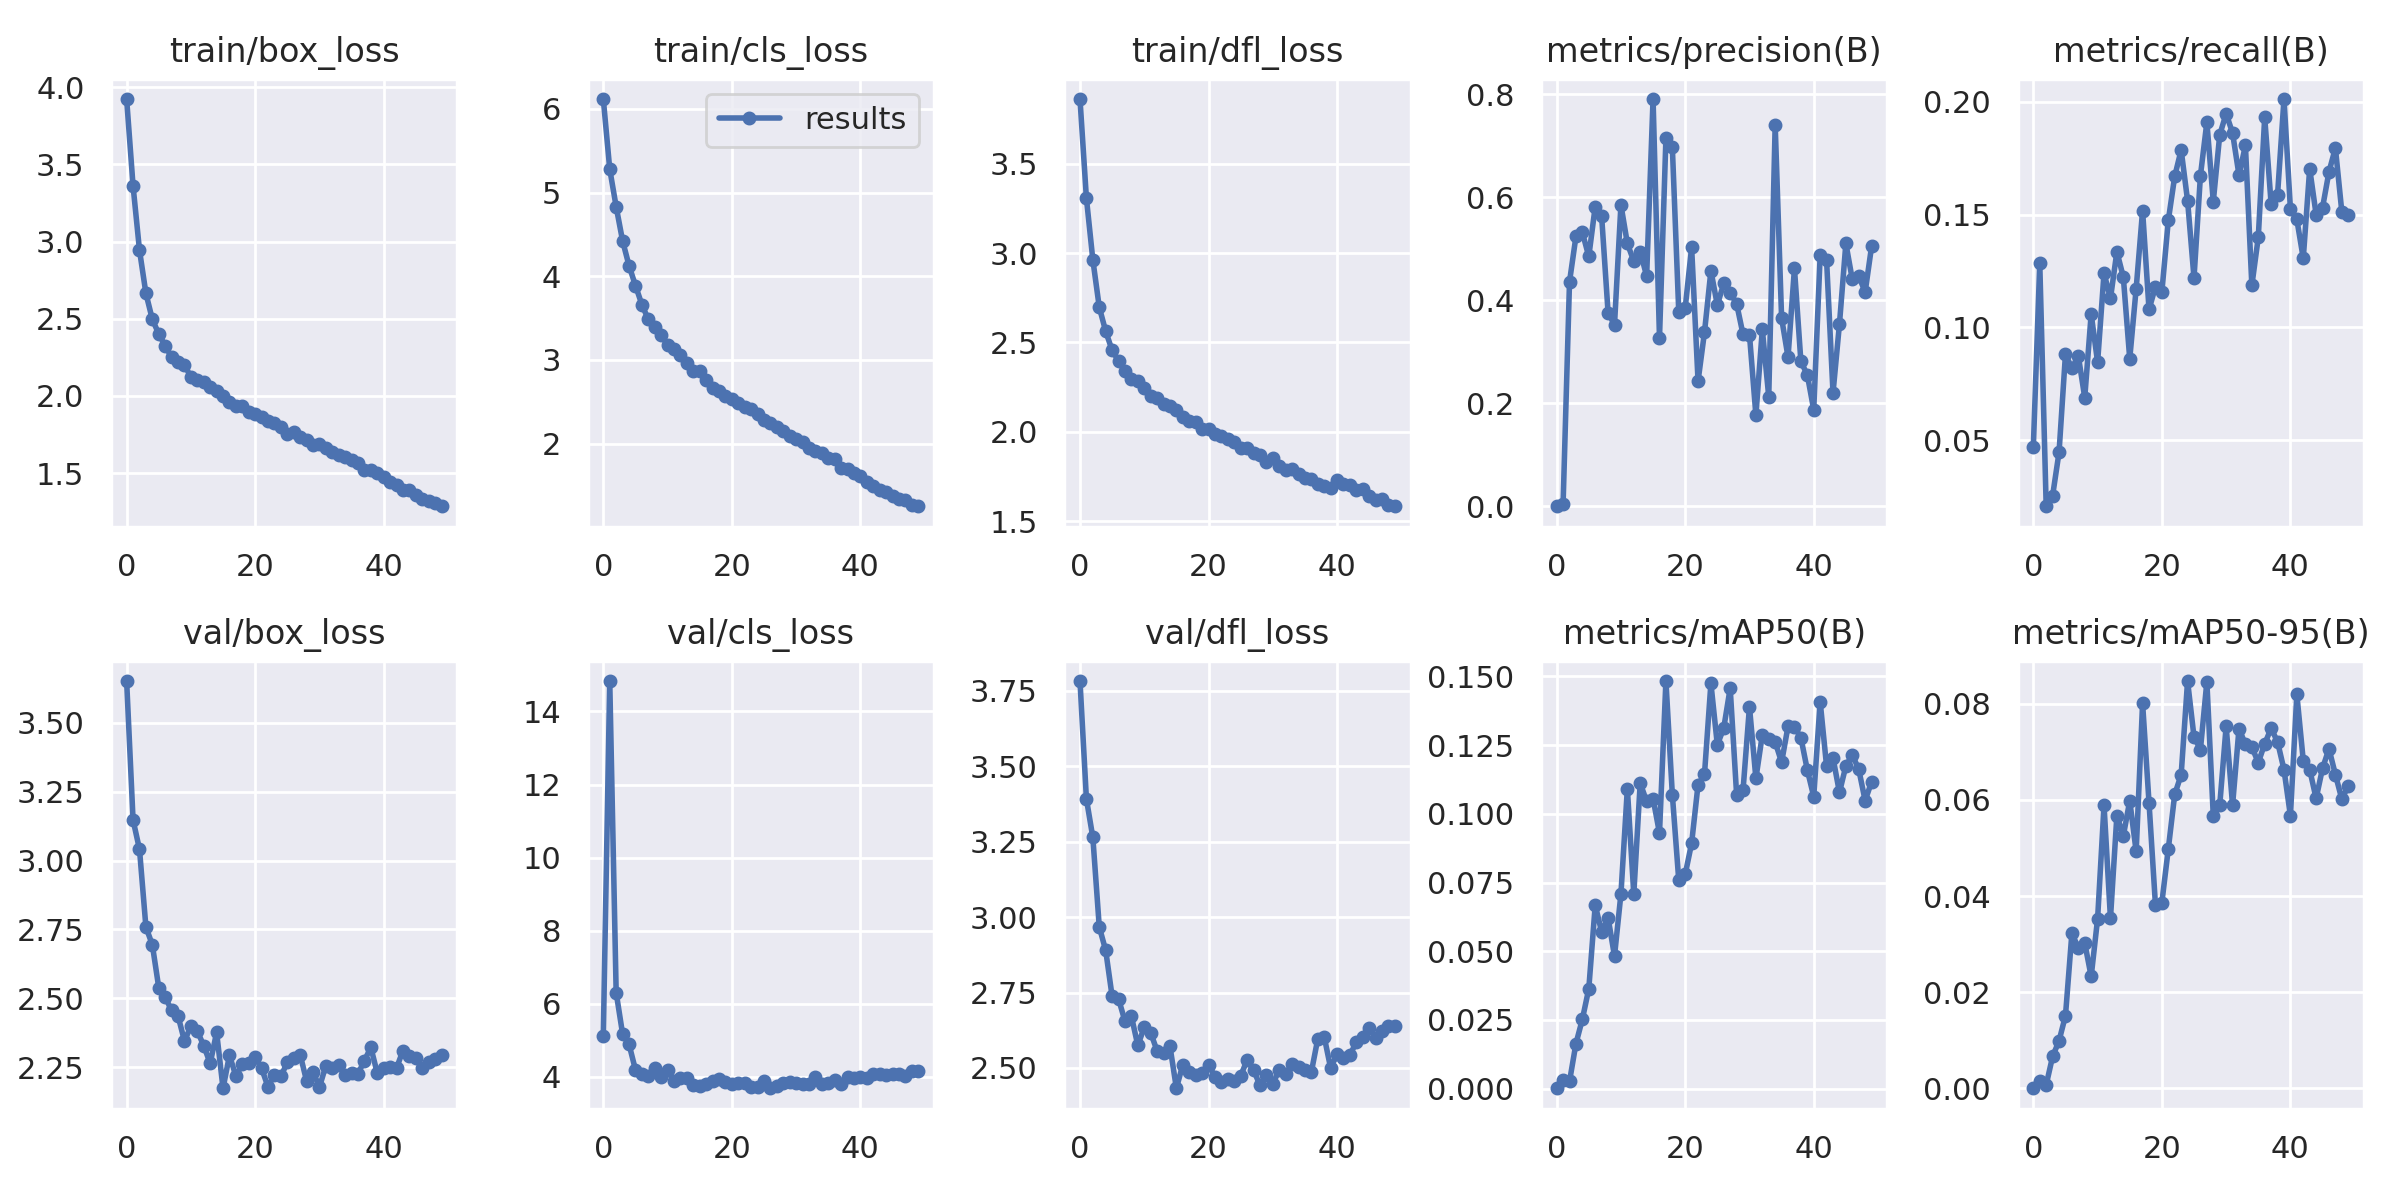

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


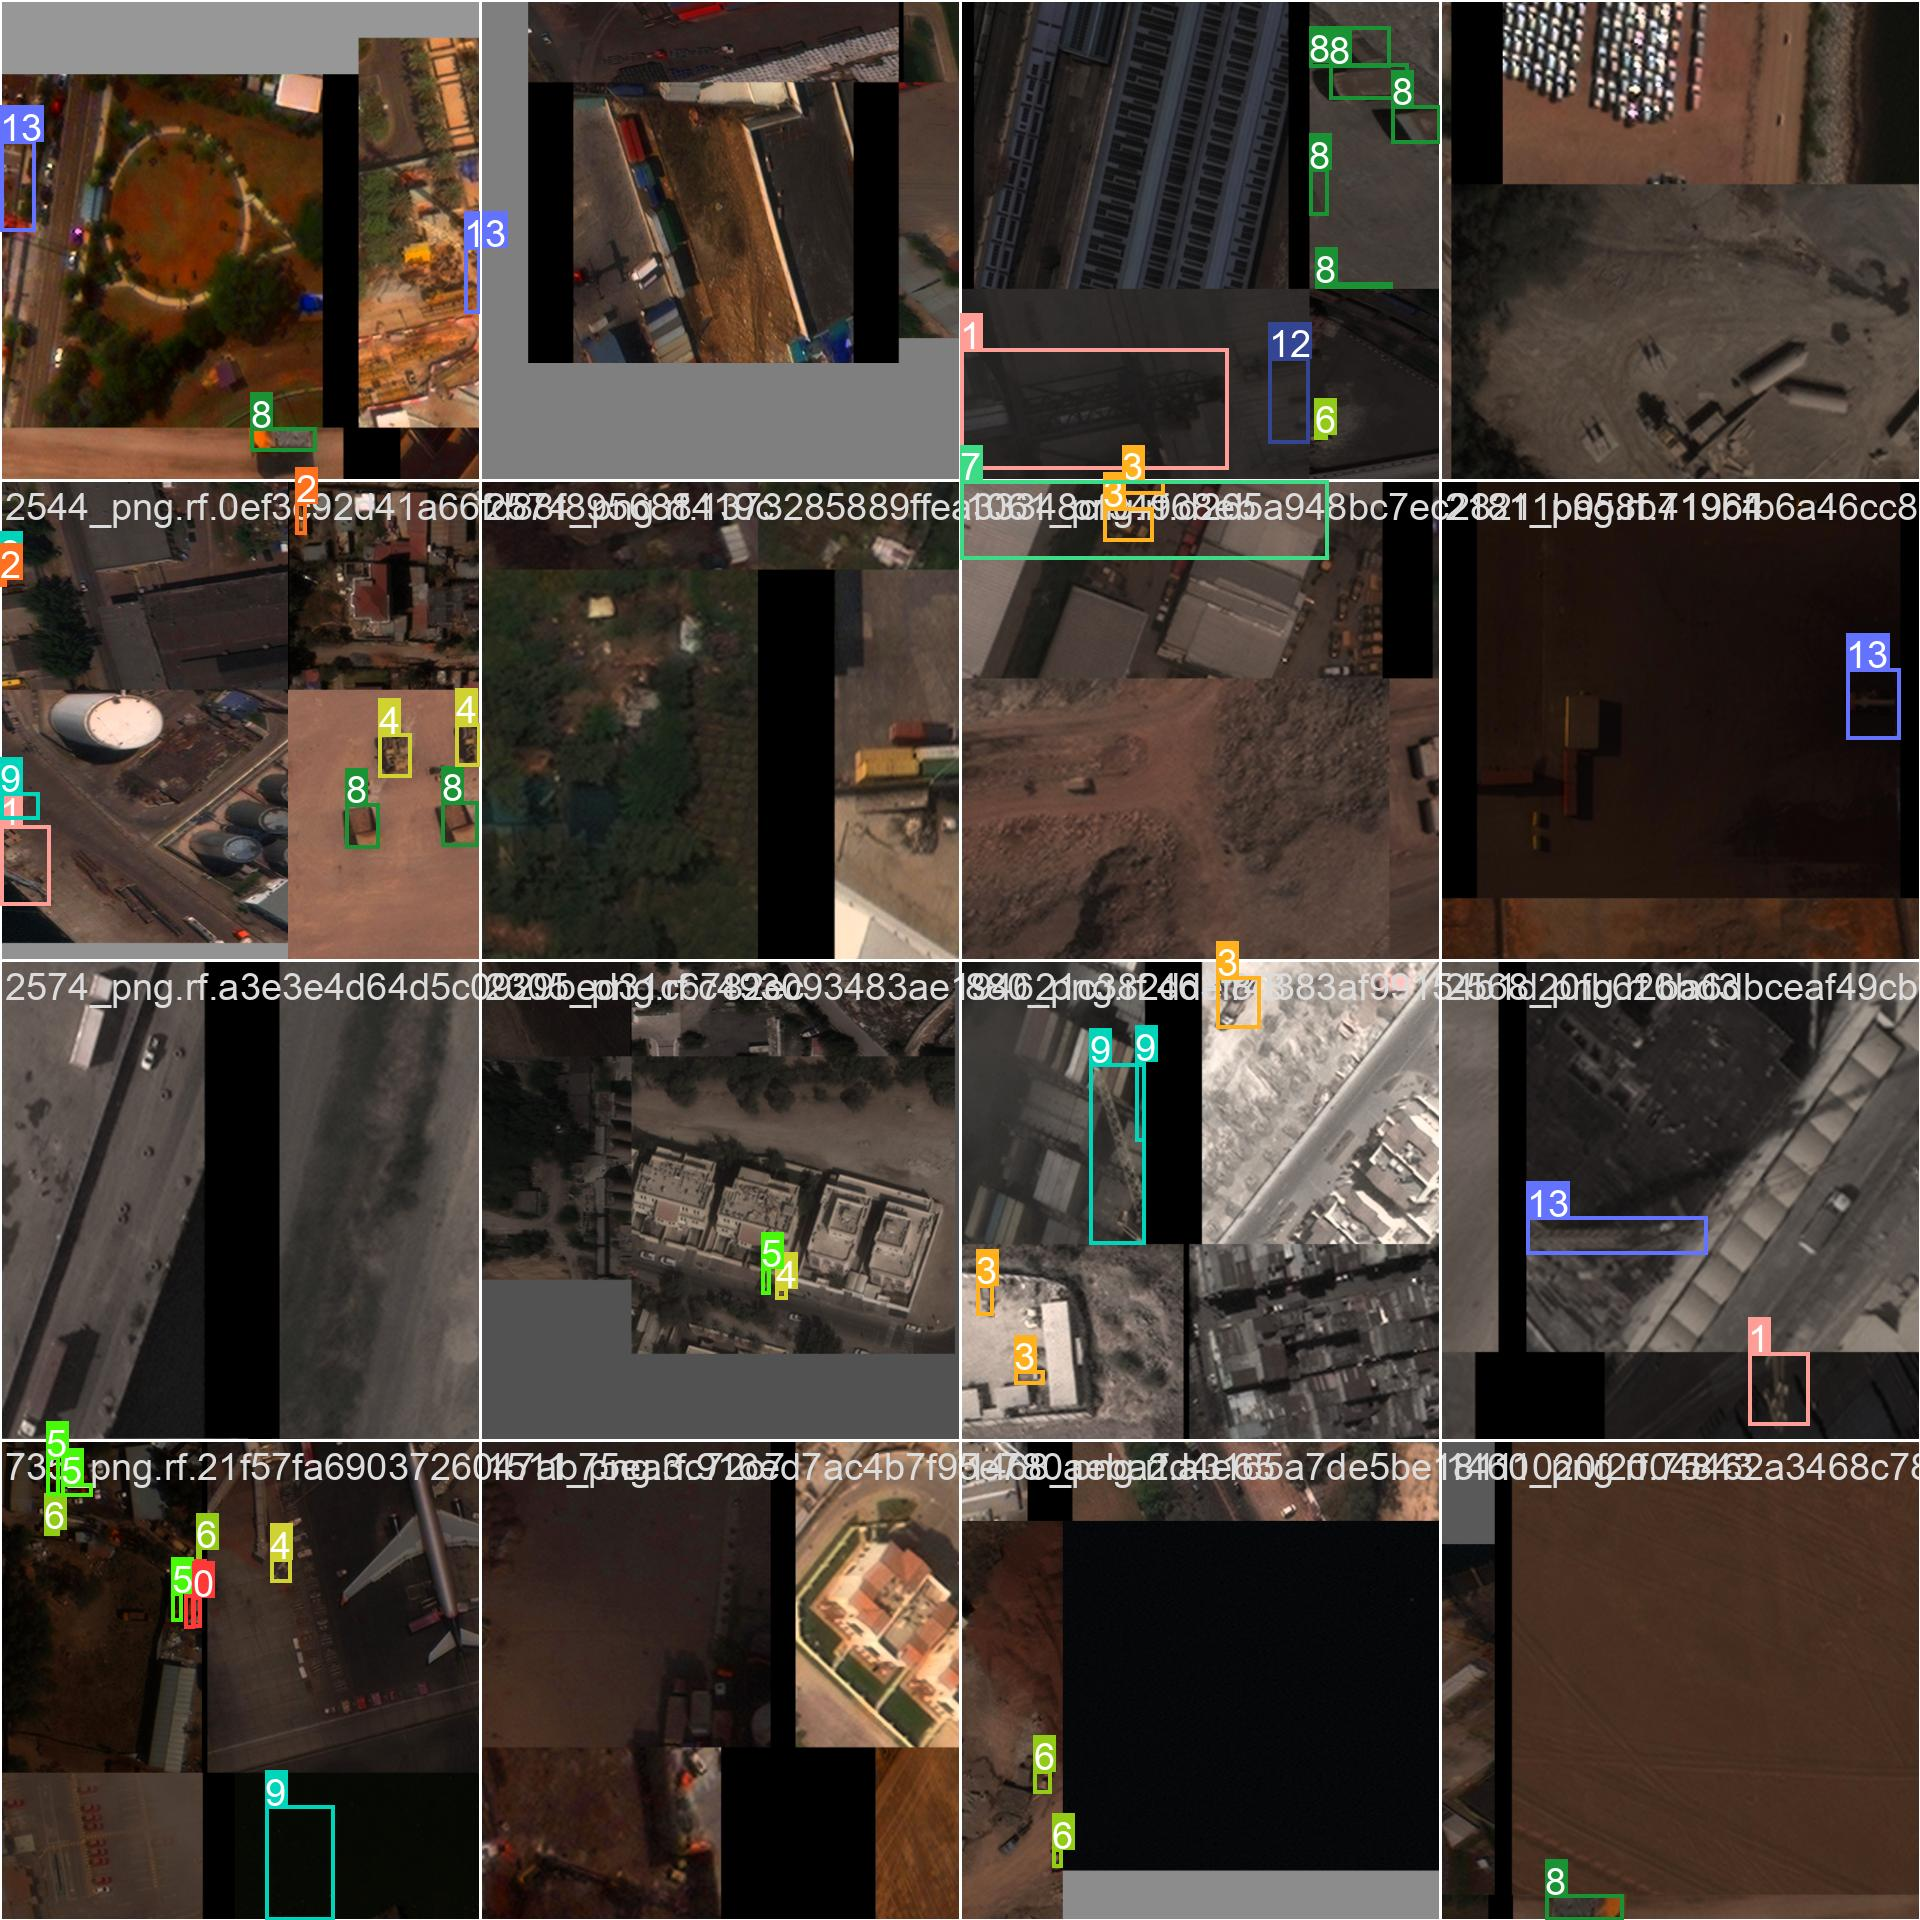

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-14 18:12:13.585825: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8_down2 summary (fused): 168 layers, 11131002 parameters, 0 gradients, 113.3 GFLOPs
image 1/163 /content/-NRMM-10/test/images/1063_png.rf.1e2fc921f5474735a2203f61ac9e673d.jpg: 576x640 137.4ms
image 2/163 /content/-NRMM-10/test/images/1063_png.rf.7f560f145dcee20d6054d3e3f551c7c2.jpg: 576x640 6.6ms
image 3/163 /content/-NRMM-10/test/images/118_png.rf.12d514584dca38b8e78236588313247d.jpg: 608x640 2 Dump Trucks, 120.3ms
image 4/163 /content/-NRMM-10/test/images/118_png.rf.3ebee2b790e2513b4ee0b5ef8e05d11b.jpg: 608x640 6.6ms
image 5/163 /content/-NRMM-10/test/images/118_png.rf.a706752cc5905b61d6f12799edbb17be.jpg: 608x640 6.6ms
image 6/163 /content/-NRMM-10/test/images/118_png.rf.c5d3425b940b17ea220c073e1a871a87.jpg: 608x640 1 Excavator, 6.5ms
image 7/163 /c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

# Let's say we want to create a directory named 'MyColabOutputs'
save_path = '/content/drive/My Drive/YOLOv8_down22'
if not os.path.exists(save_path):
    os.makedirs(save_path)


Mounted at /content/drive


In [ ]:
import shutil

# Source directory in Colab where your files are saved
src_dir_p = '/content/runs/detect/predict'

# List all files in your source directory
files = os.listdir(src_dir_p)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_p, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

# Source directory in Colab where your files are saved
src_dir_v = '/content/runs/detect/val'

# List all files in your source directory
files = os.listdir(src_dir_v)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_v, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

import shutil

# Source directory in Colab where your files are saved
src_dir_t = '/content/runs/detect/train'

# List all files in your source directory
files = os.listdir(src_dir_t)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_t, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

In [ ]:
#also the model
shutil.copy("/content/runs/detect/train/weights/best.pt", save_path)
shutil.copy("/content/runs/detect/train/weights/last.pt", save_path)

'/content/drive/My Drive/YOLOv8_down22/last.pt'

###c. edit the p3 layer.The downsampling factor is changed from 32 to 16.

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("/content/yolov8_down3.yaml")  # build a new model from scratch

# Use the model
model.train(data="/content/-NRMM-10/data.yaml", epochs=50, imgsz=640,patience=30)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 1]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

/content


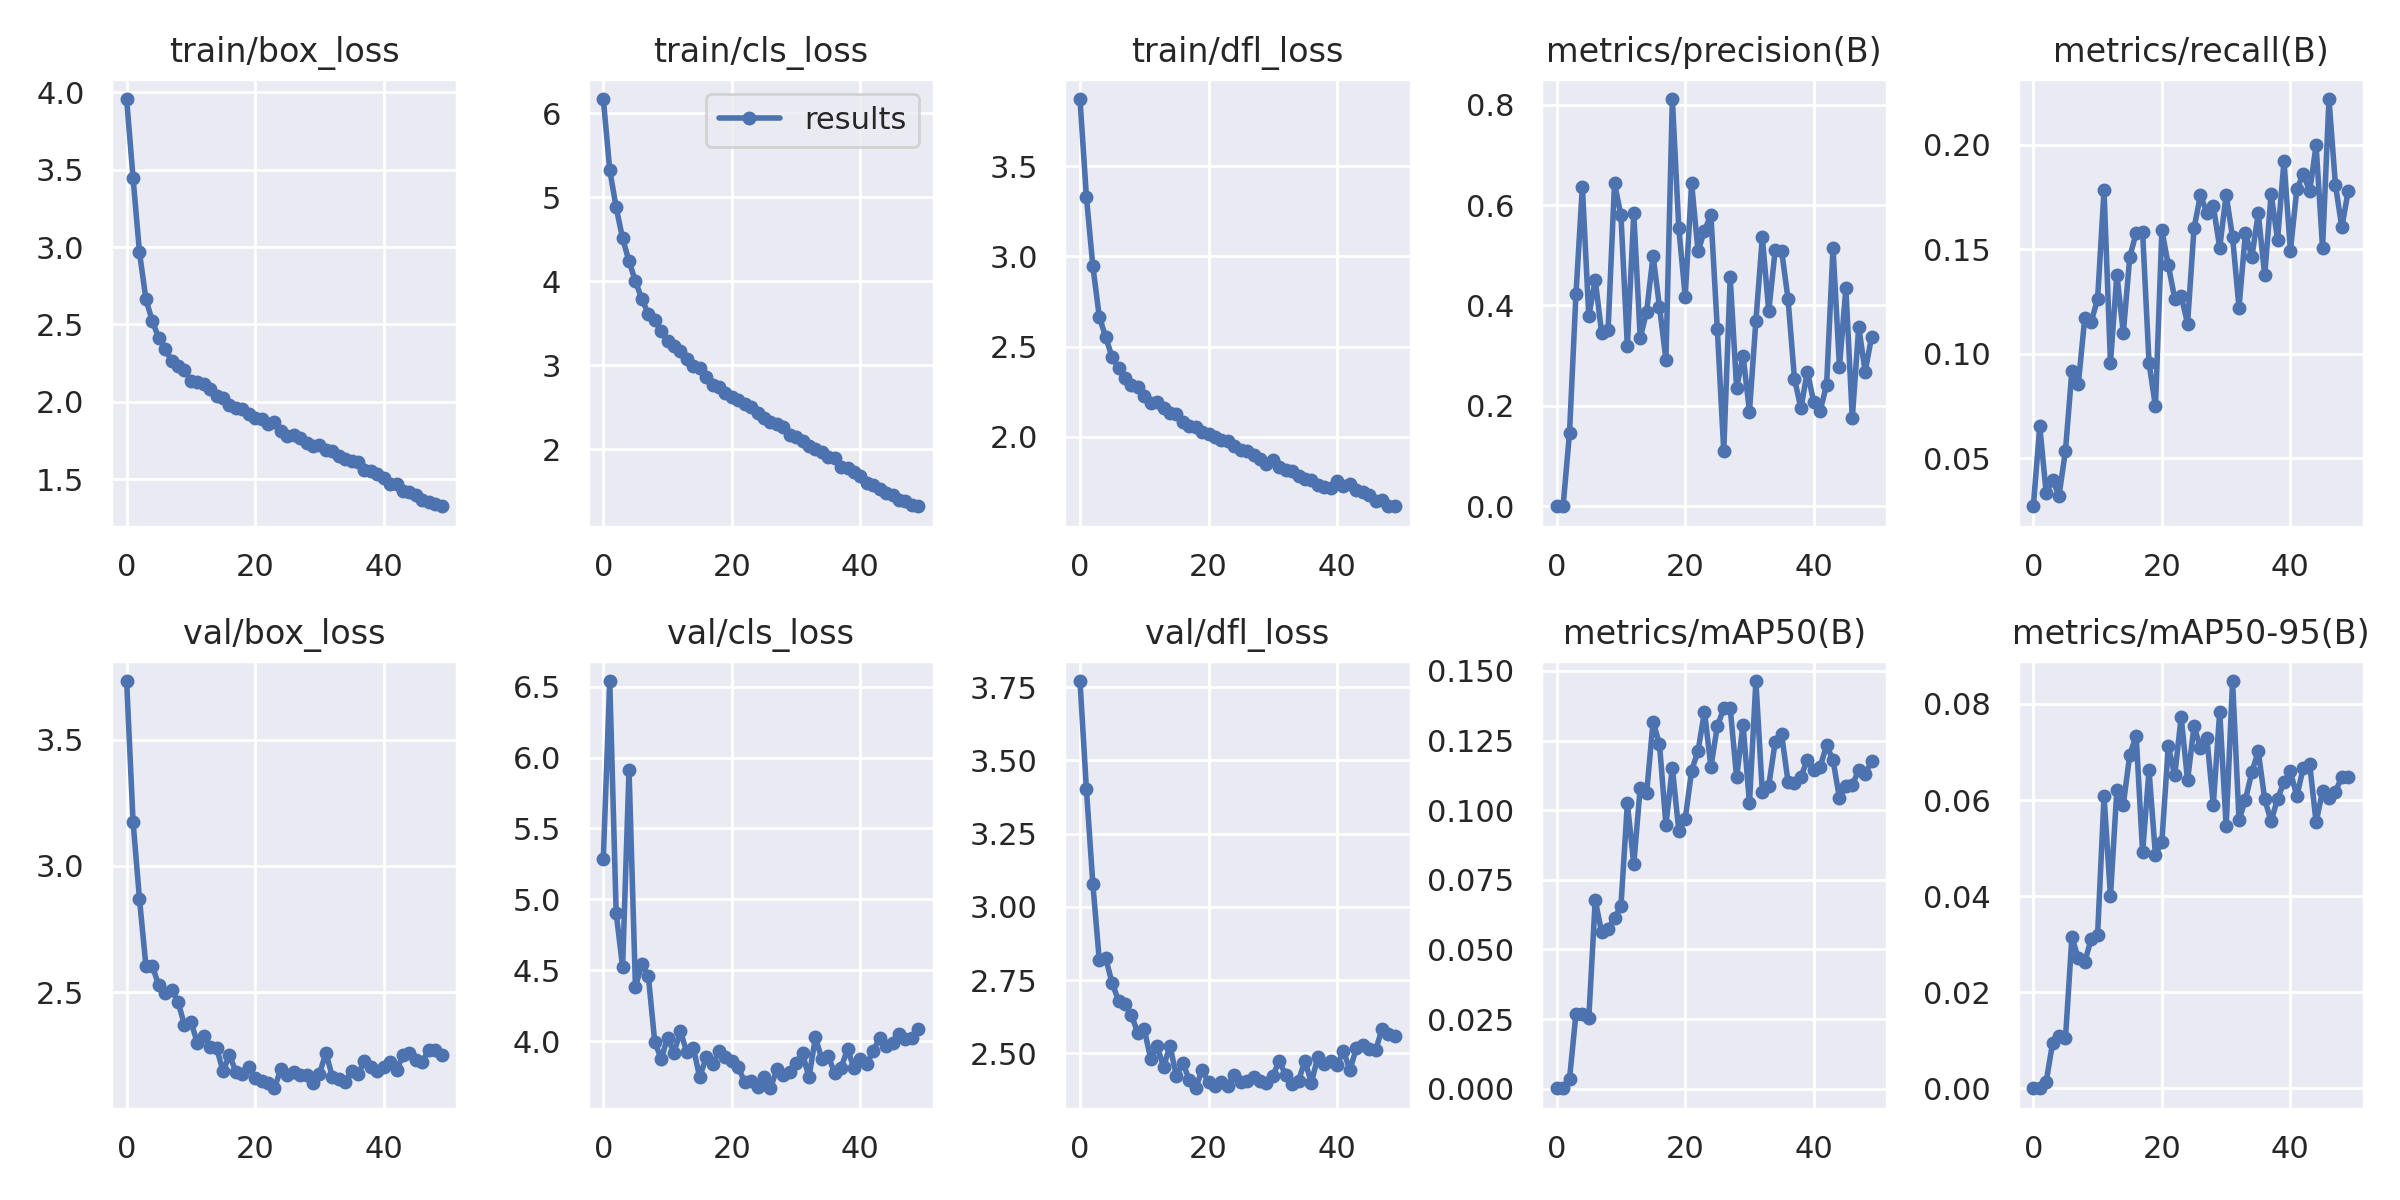

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


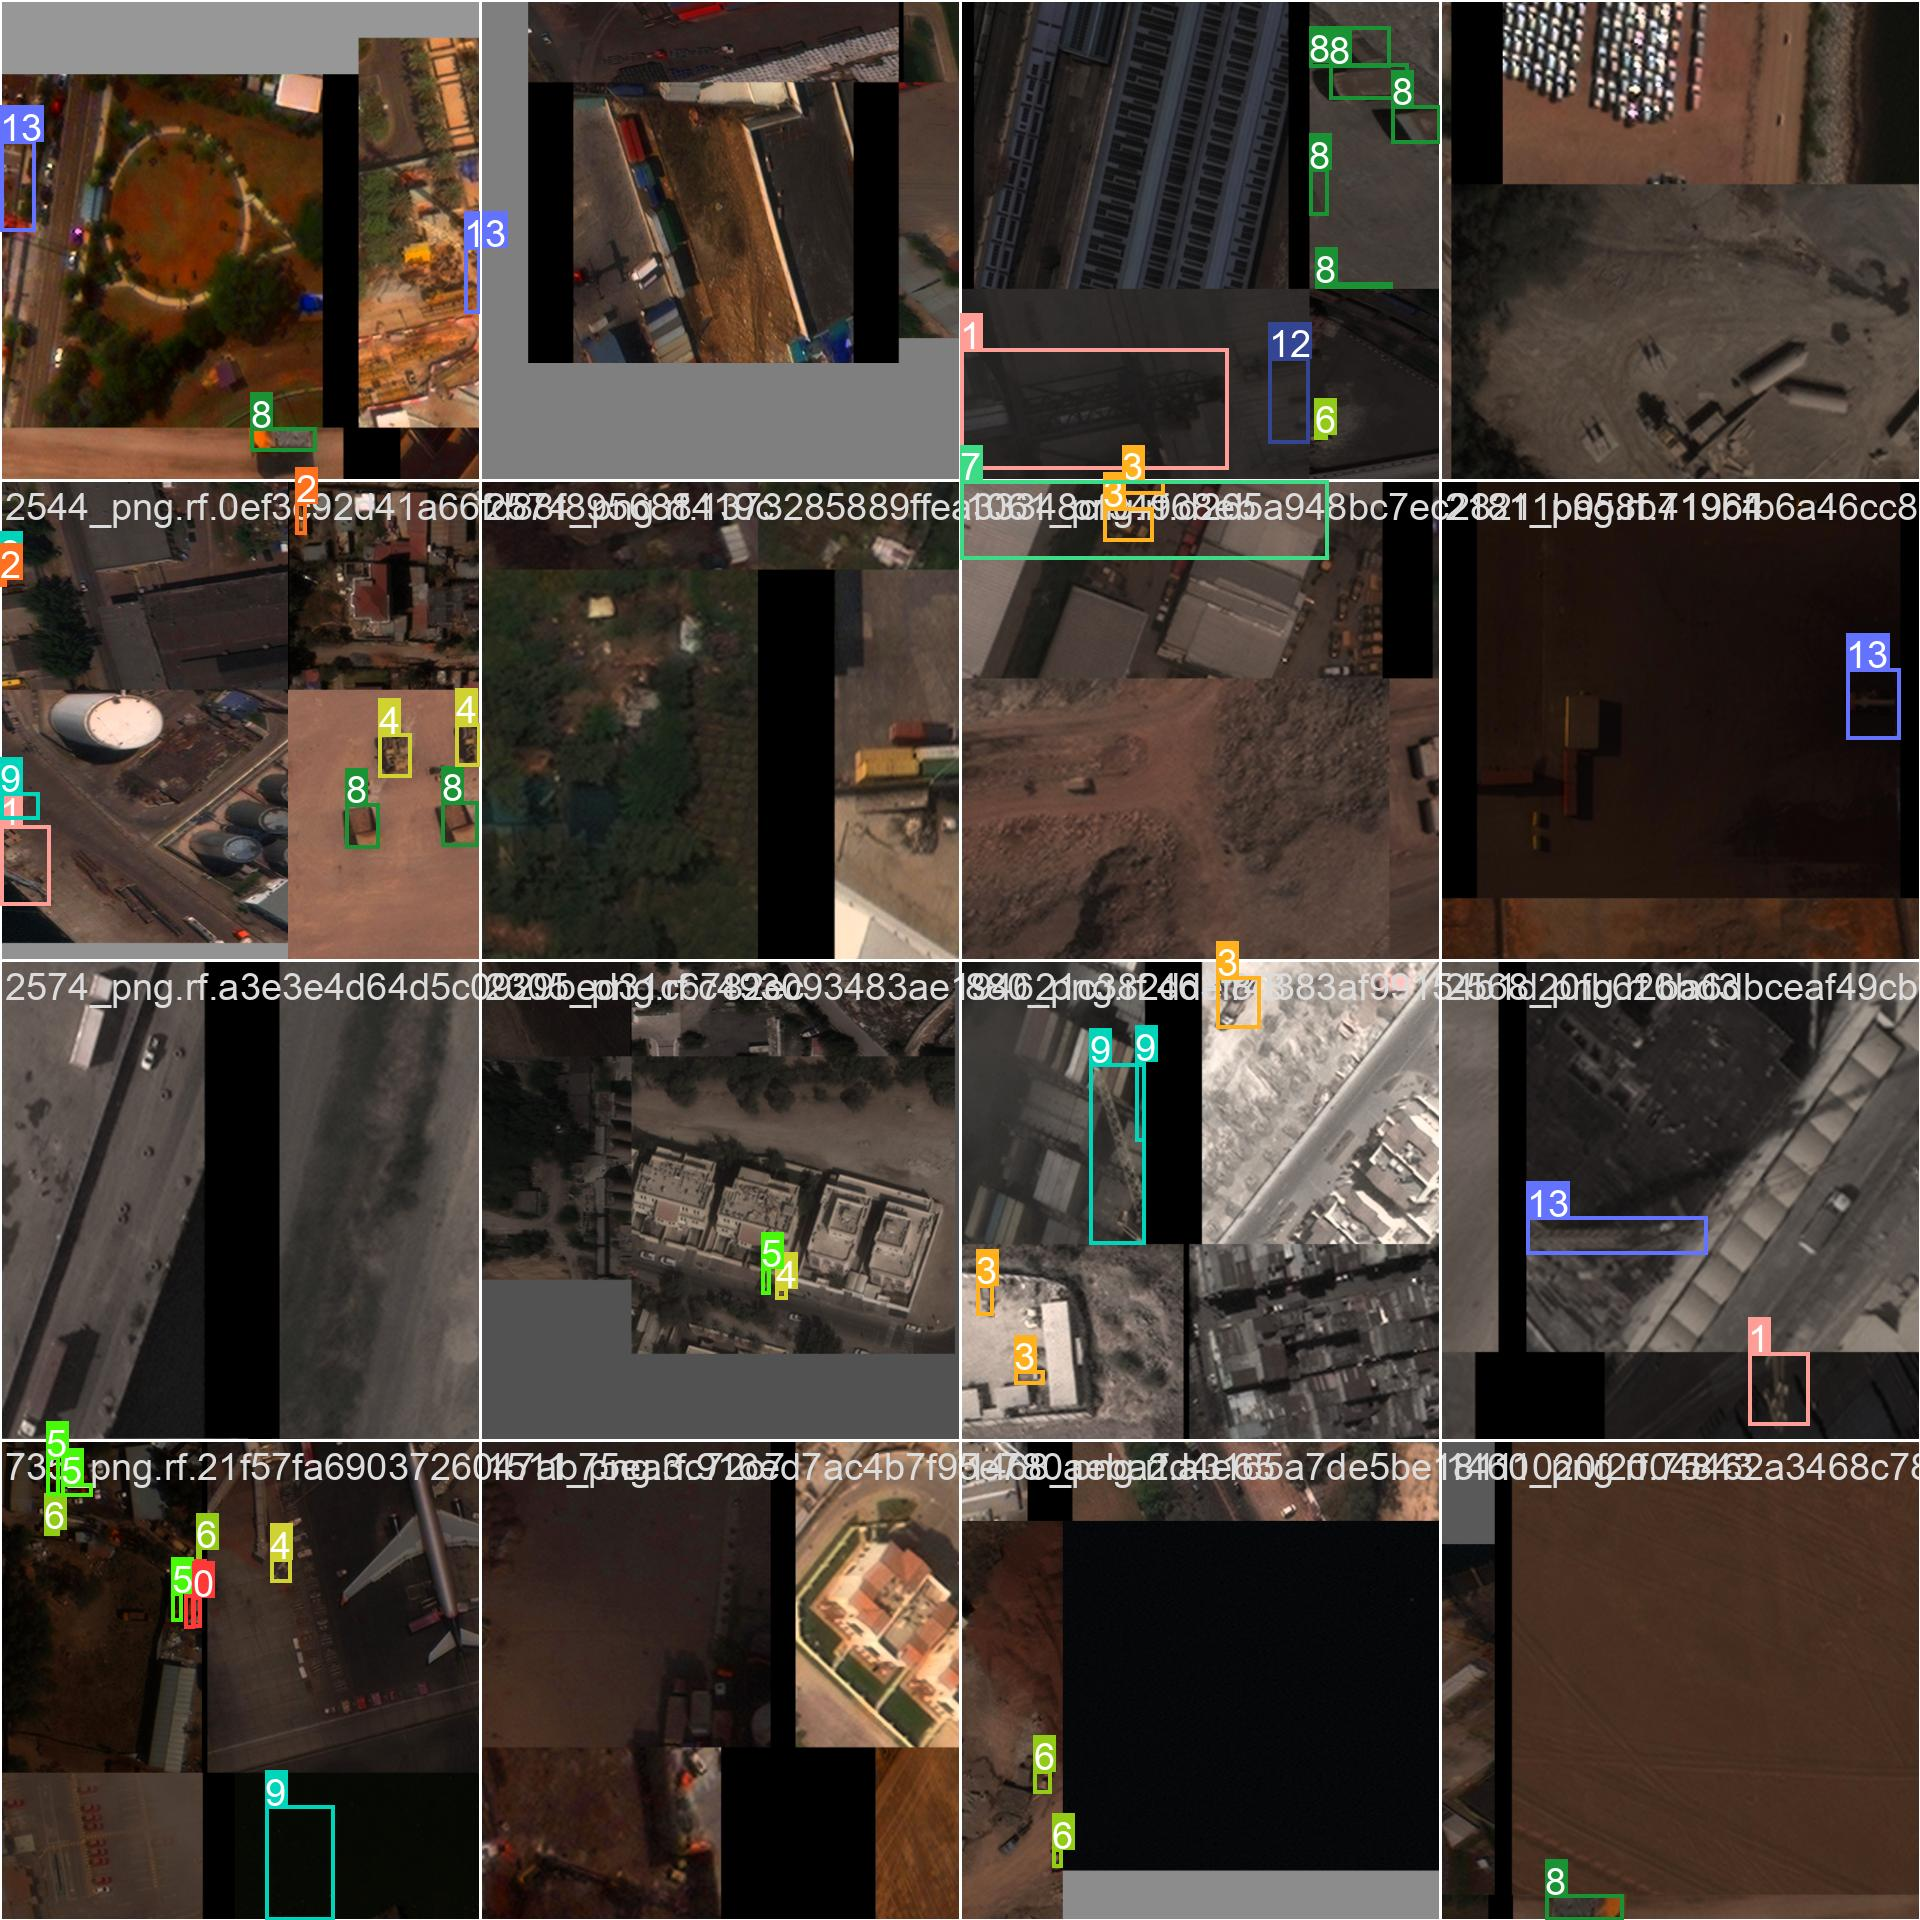

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/train_batch0.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-14 13:30:06.218257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8_down3 summary (fused): 168 layers, 11131002 parameters, 0 gradients, 106.1 GFLOPs
val: Scanning /content/-NRMM-10/valid/labels.cache... 198 images, 25 backgrounds, 0 corrupt: 100% 198/198 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:05<00:00,  2.23it/s]
                   all        198        371       0.37      0.156      0.137     0.0793
          Cement Mixer        198          3      0.812      0.667      0.666      0.467
       Container Crane        198         72     0.0481     0.0278     0.0186    0.00575
           Crane Truck        198         12      0.122     0.0833     0.0719      0.046
            Dump Truck        198         68      0.347      0.353      0

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-14 13:30:36.114318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8_down3 summary (fused): 168 layers, 11131002 parameters, 0 gradients, 106.1 GFLOPs
image 1/163 /content/-NRMM-10/test/images/1063_png.rf.1e2fc921f5474735a2203f61ac9e673d.jpg: 576x640 118.0ms
image 2/163 /content/-NRMM-10/test/images/1063_png.rf.7f560f145dcee20d6054d3e3f551c7c2.jpg: 576x640 7.0ms
image 3/163 /content/-NRMM-10/test/images/118_png.rf.12d514584dca38b8e78236588313247d.jpg: 608x640 1 Dump Truck, 117.0ms
image 4/163 /content/-NRMM-10/test/images/118_png.rf.3ebee2b790e2513b4ee0b5ef8e05d11b.jpg: 608x640 7.9ms
image 5/163 /content/-NRMM-10/test/images/118_png.rf.a706752cc5905b61d6f12799edbb17be.jpg: 608x640 6.9ms
image 6/163 /content/-NRMM-10/test/images/118_png.rf.c5d3425b940b17ea220c073e1a871a87.jpg: 608x640 3 Excavators, 6.9ms
image 7/163 /c

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:100]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Let's say we want to create a directory named 'MyColabOutputs'
save_path = '/content/drive/My Drive/YOLOv8_down3'
if not os.path.exists(save_path):
    os.makedirs(save_path)

import shutil

# Source directory in Colab where your files are saved
src_dir_p = '/content/runs/detect/predict2'

# List all files in your source directory
files = os.listdir(src_dir_p)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_p, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

# Source directory in Colab where your files are saved
src_dir_v = '/content/runs/detect/val3'

# List all files in your source directory
files = os.listdir(src_dir_v)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_v, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

import shutil

# Source directory in Colab where your files are saved
src_dir_t = '/content/runs/detect/train3'

# List all files in your source directory
files = os.listdir(src_dir_t)

# Loop through and move each file to the destination directory on Google Drive
for file_name in files:
    full_file_name = os.path.join(src_dir_t, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, save_path)

###d. edit the p2 and p3 layer together.The downsampling factor is changed from 32 to 8.

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("/content/yolov8_down4.yaml")  # build a new model from scratch

# Use the model
model.train(data="/content/-NRMM-10/data.yaml", epochs=25, imgsz=640,patience=30,batch=32)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 1]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 1]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

OutOfMemoryError: ignored